* all_688 stores the original released data inside each folder
* aff_neurons stores the affine result inside each brain folder's affine folder
* aff_600 stores all the affine result in the aff_neurons to the single folder

In [1]:
import pandas as pd
import os
brain_regis = pd.read_excel(os.path.join('/home/penglab/Documents/result', 'brain_registration.xlsx'), index_col=[0], skiprows=[0],
                            names=['ID', 'y_initial', 'x_initial', 'z_initial', 'y_after', 'x_after', 'z_after',
                                   'ration', 'flip', 'flip_axis'])
brain_regis.loc[:, 'x_downsample'] = brain_regis.loc[:, 'x_initial'] / brain_regis.loc[:, 'x_after']
brain_regis.loc[:, 'y_downsample'] = brain_regis.loc[:, 'y_initial'] / brain_regis.loc[:, 'y_after']
brain_regis.loc[:, 'z_downsample'] = brain_regis.loc[:, 'z_initial'] / brain_regis.loc[:, 'z_after']
brain_regis.drop_duplicates(keep='first', inplace=True)
brain_regis.fillna(value='NA', inplace=True)
brain_regis = brain_regis.loc[~brain_regis.index.duplicated(keep='first')]
brain_regis.loc[:, 'x_initial'] = brain_regis.loc[:, 'x_initial'].astype(float)
brain_regis.loc[:, 'y_initial'] = brain_regis.loc[:, 'y_initial'].astype(float)
brain_regis.loc[:, 'z_initial'] = brain_regis.loc[:, 'z_initial'].astype(float)

In [2]:
brain_regis

,y_initial,x_initial,z_initial,y_after,x_after,z_after,ration,flip,flip_axis,x_downsample,y_downsample,z_downsample
ID,,,,,,,,,,,,
17109,35000.0,22793.0,10533.0,547,356,659,xy64z16,否,NA,64.0253,63.9854,15.9833
17302,54600.0,34412.0,9847.0,853,537,615,xy64z16,否,NA,64.0819,64.0094,16.0114
17541,54600.0,39328.0,11073.0,426,307,346,xy128z32,否,NA,128.104,128.169,32.0029
17542,54600.0,34748.0,11333.0,426,271,354,x128.221y128z32,否,NA,128.221,128.169,32.0141
17545,54600.0,35989.0,10750.0,853,562,671,xy64z16,否,NA,64.0374,64.0094,16.0209
17781,54600.0,34722.0,11021.0,426,271,344,x128.125y128.17z32,否,NA,128.125,128.169,32.0378
17782,28000.0,45000.0,11786.0,437,703,736,xy64z16,是,Y,64.0114,64.0732,16.0136
17787,24275.0,36400.0,11478.0,189,284,358,x128.17y128.44z32,否,NA,128.169,128.439,32.0615
17788,27188.0,35000.0,11120.0,212,273,347,128.205y128.245z32,是,Y,128.205,128.245,32.0461


### Check the resulted affinement neurons generated by me

In [15]:
import os
aff_folder = '/home/penglab/Documents/result/resulk'
aff_Problem = []
problem_brain = []
for i_brain in os.listdir(aff_folder):
    
    if int(i_brain) not in brain_regis.index.tolist():
        print('\nSkip '+str(i_brain))
        continue
    print('\n--------- Process brain '+str(i_brain))
    print('------------- '+str(len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))))+' neurons in total')
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    error_c = 0
    
    for iter_swc in os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(os.path.join(aff_folder, i_brain),'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        neuron_info
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            flag_E = True
            #print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            flag_E = True
            #print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_c = error_c +1
            problem_brain.append(i_brain)
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_c/len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))),2))+'% neurons have error')
    
problem_brain = list(set(problem_brain))


--------- Process brain 17302
------------- 93 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17545
------------- 87 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17781
------------- 4 neurons in total
------------- 0.0% neurons have error

Skip 18452

--------- Process brain 18454
------------- 85 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18457
------------- 110 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18458
------------- 43 neurons in total
------------- 0.0% neurons have error

Skip 18462

Skip 18463

--------- Process brain 18464
------------- 25 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18465
------------- 61 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18869
------------- 6 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17782
-------

In [9]:
problem_brain = list(set(problem_brain))
print(str(problem_brain)+' have problems')

['18455'] have problems


## Check problem_brain's resample result
* aff_neurons stores the affine result of SEU inside each brain folder's affine folder

In [10]:
path_temp = aff_folder 
error_r = 0
for i_brain in problem_brain:
    path_brain = os.path.join(path_temp,i_brain)
    # specific downsample size for the i_brain
    x_aff_bound = brain_regis.loc[int(i_brain), 'x_after']
    y_aff_bound = brain_regis.loc[int(i_brain), 'y_after']
    z_aff_bound = brain_regis.loc[int(i_brain), 'z_after']
    for iter_swc in os.listdir(os.path.join(path_brain, 'resample')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(path_brain, 'resample'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound))     
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_r = error_r +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_r/len(os.listdir(os.path.join(path_brain, 'resample'))),2))+'% neurons have exceeds the boundary in brain '+ str(i_brain))

------------- 0.0% neurons have exceeds the boundary in brain 18455


## Check problem_brain's affinemnt result
* aff_neurons stores the affine result of SEU inside each brain folder's affine folder

In [12]:
path_temp = aff_folder 
problemDF = pd.DataFrame()
error_r = 0
for i_brain in problem_brain:
    path_brain = os.path.join(path_temp,i_brain)
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    for iter_swc in os.listdir(os.path.join(path_brain, 'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(path_brain, 'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            problemDF.loc[neuron_info,'max_x'] = max(swc['x'])
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound)) 
            problemDF.loc[neuron_info,'max_y'] = max(swc['y'])
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            problemDF.loc[neuron_info,'max_z'] = max(swc['z'])
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if min(swc['x'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of x is '+ str(min(swc['x'])))
            problemDF.loc[neuron_info,'min_x'] = min(swc['x'])
            flag_E = True
        if min(swc['y'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of y is '+ str(min(swc['y'])))
            problemDF.loc[neuron_info,'min_y'] = min(swc['y'])
            flag_E = True
        if min(swc['z'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of z is '+ str(min(swc['z'])))
            problemDF.loc[neuron_info,'min_z'] = min(swc['z'])
            flag_E = True
        
        if flag_E:
            error_r = error_r +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_r/len(os.listdir(os.path.join(path_brain, 'affine'))),2))+'% neurons have exceeds the boundary in brain '+ str(i_brain))

	18455_00002
		Maximum value of x is 598.13, while the boundary is 568
		Minimum value of y is -82.902
	18455_00004
		Minimum value of y is -125.89
	18455_00008
		Maximum value of x is 574.413, while the boundary is 568
		Minimum value of y is -124.75200000000001
	18455_00009
		Maximum value of x is 617.72, while the boundary is 568
		Minimum value of y is -139.749
	18455_00012
		Minimum value of y is -134.469
	18455_00013
		Minimum value of y is -158.469
	18455_00014
		Minimum value of y is -84.13600000000001
	18455_00015
		Maximum value of x is 622.4, while the boundary is 568
		Minimum value of y is -14.562000000000001
	18455_00016
		Minimum value of y is -151.023
	18455_00017
		Maximum value of x is 728.253, while the boundary is 568
		Minimum value of y is -30.410999999999998
	18455_00018
		Maximum value of x is 816.579, while the boundary is 568
		Minimum value of y is -29.791
	18455_00019
		Maximum value of x is 603.499, while the boundary is 568
		Minimum value of y is -15.5840

	18455_00207
		Maximum value of x is 594.192, while the boundary is 568
		Maximum value of z is 790.9680000000001, while the boundary is 456
		Minimum value of y is -79.251
	18455_00208
		Maximum value of x is 586.056, while the boundary is 568
		Maximum value of z is 765.845, while the boundary is 456
		Minimum value of y is -83.149
	18455_00220
		Maximum value of z is 758.701, while the boundary is 456
		Minimum value of y is -225.197
	18455_00224
		Maximum value of z is 775.533, while the boundary is 456
		Minimum value of y is -155.5
	18455_00240
		Maximum value of x is 770.005, while the boundary is 568
		Maximum value of z is 769.623, while the boundary is 456
		Minimum value of y is -138.035
	18455_00252
		Maximum value of x is 620.357, while the boundary is 568
		Maximum value of z is 821.569, while the boundary is 456
		Minimum value of y is -56.076
	18455_00253
		Maximum value of x is 630.229, while the boundary is 568
		Maximum value of z is 823.377, while the boundary is 45

In [14]:
problemDF.fillna(value='Normal',inplace = True)
#problemDF.to_excel('/home/penglab/NMTcode/problemDF.xlsx')



### Below comparing the affine result between previous and now

In [ ]:
import numpy as np
import shutil
import seaborn as sns
input_pre = '/home/penglab/Documents/result/2_affine_swc'
output_pre = '/home/penglab/Documents/result/cp_aff'

input_cur = '/home/penglab/Documents/result/resulk'
output_cur = '/home/penglab/Documents/result/cp_aff'

folder = os.path.exists(os.path.join(output_pre,'pre'))
if not folder:  
    os.makedirs(os.path.join(output_pre,'pre'))
for i_brain in os.listdir(input_pre):
    for i_swc in os.listdir(os.path.join(input_pre,i_brain)):
        oldname = os.path.join(input_pre,i_brain)+ '/'+ str(i_swc)
        newname = os.path.join(output_cur,'pre') + '/'+ str(i_swc)
        shutil.copyfile(oldname,newname)

folder = os.path.exists(os.path.join(output_cur,'cur'))
if not folder:  
    os.makedirs(os.path.join(output_cur,'cur'))
for i_brain in os.listdir(input_cur):
    for i_folder in os.listdir(os.path.join(input_cur,i_brain)):
        if i_folder == 'affine':
            for i_swc in os.listdir(os.path.join(os.path.join(input_cur,i_brain),i_folder)):
                oldname = os.path.join(os.path.join(input_cur,i_brain),i_folder) + '/'+ str(i_swc)
                newname = os.path.join(output_cur,'cur') + '/'+ str(i_swc)
                shutil.copyfile(oldname,newname)
                
                
cur_path_aff = '/home/penglab/Documents/result/cp_aff/cur'
pre_path_aff = '/home/penglab/Documents/result/cp_aff/pre'
affDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
pre_L = []

for i_swc in os.listdir(pre_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    pre_L.append(neuronname)
for i_swc in os.listdir(cur_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in pre_L :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    #brain_L.append(brain_temp)
    affDF.loc[iter_i,"brain"] = brain_temp
    affDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(pre_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_raff = os.path.join(pre_path_aff,i_swc_old)
    path_cur_raff = os.path.join(cur_path_aff,i_swc)
    n_skip = 0
    with open(path_pre_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF.shape[0])+' neurons to be compared in this table')

n_value = affDF.shape[0]
affDF.loc[:, 'brain'] = affDF.loc[:, 'brain'].astype(int)
affDF.loc[:,'idx'] = affDF.index.tolist()
affDF.loc[:, 'pre_x'] = affDF.loc[:, 'pre_x'].astype(float)
affDF.loc[:, 'pre_y'] = affDF.loc[:, 'pre_y'].astype(float)
affDF.loc[:, 'pre_z'] = affDF.loc[:, 'pre_z'].astype(float)
affDF.loc[:,'subx'] = affDF.loc[:,'pre_x'] - affDF.loc[:,'cur_x']
affDF.loc[:,'suby'] = affDF.loc[:,'pre_y'] - affDF.loc[:,'cur_y']
affDF.loc[:,'subz'] = affDF.loc[:,'pre_z'] - affDF.loc[:,'cur_z']
affDF.loc[:, 'subx'] = affDF.loc[:, 'subx'].astype(float)
affDF.loc[:, 'suby'] = affDF.loc[:, 'suby'].astype(float)
affDF.loc[:, 'subz'] = affDF.loc[:, 'subz'].astype(float)
affILL = pd.DataFrame(index = range(1,affDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL.loc[:, 'idx'] = np.tile(range(1,affDF.shape[0]+1), 3)
affILL.loc[:, 'axisV'] = affILL.loc[:, 'axisV'].astype(float)
affILL.loc[range(1,n_value+1), 'brain'] = affDF.loc[:,'brain'].tolist()
affILL.loc[range(1,n_value+1),'axisV']=affDF.loc[:,'subx'].tolist()
affILL.loc[range(1,n_value+1),'dim']='x'
affILL.loc[range(1,n_value+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[range(n_value+1,n_value*2+1), 'brain'] = affDF.loc[:,'brain'].tolist()
affILL.loc[range(n_value+1,n_value*2+1),'axisV']=affDF.loc[:,'suby'].tolist()
affILL.loc[range(n_value+1,n_value*2+1),'dim']='y'
affILL.loc[range(n_value+1,n_value*2+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[range(n_value*2+1,n_value*3+1), 'brain'] =affDF.loc[:,'brain'].tolist()
affILL.loc[range(n_value*2+1,n_value*3+1),'axisV']=affDF.loc[:,'subz'].tolist()
affILL.loc[range(n_value*2+1,n_value*3+1),'dim']='z'
affILL.loc[range(n_value*2+1,n_value*3+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[:, 'brain'] = affILL.loc[:, 'brain'].astype(int)

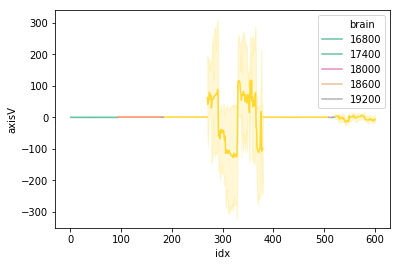

In [32]:
sns.lineplot(x='idx', y= 'axisV',hue='brain',data=affILL, palette="Set2")

In [35]:
set(affILL.loc[:, 'brain'])

{17302, 17545, 17781, 17782, 18454, 18455, 18457, 18458, 18464, 18465, 18869}

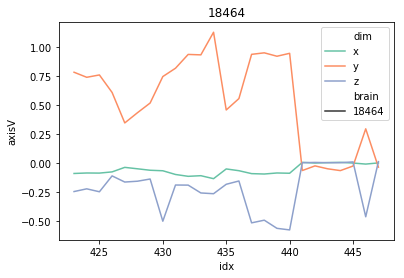

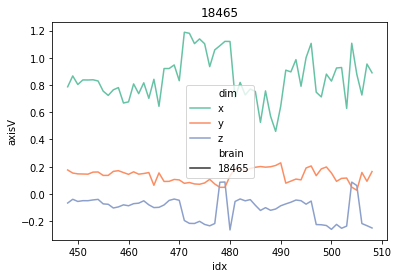

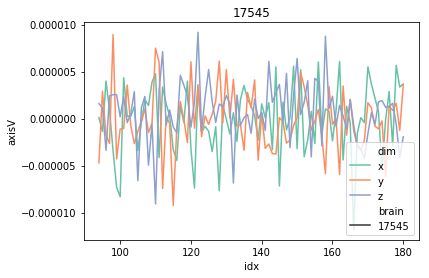

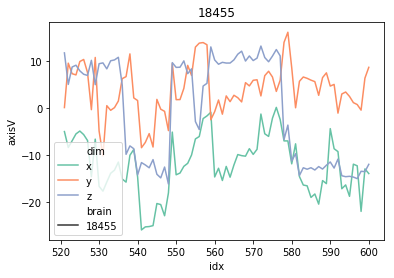

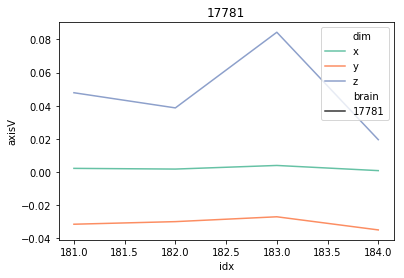

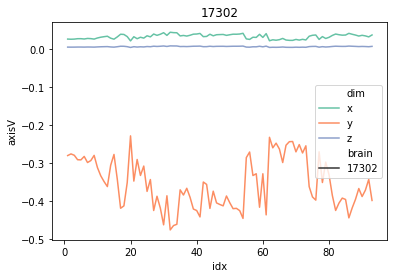

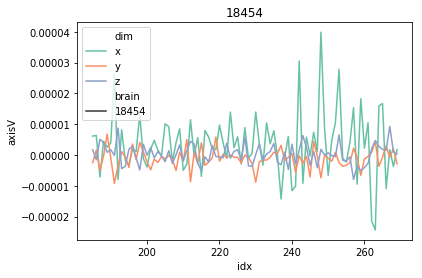

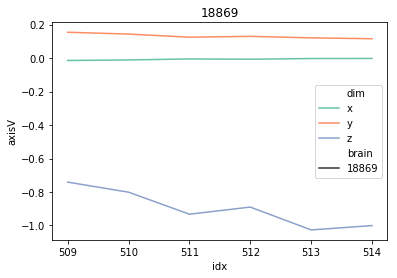

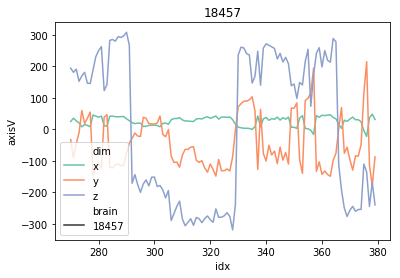

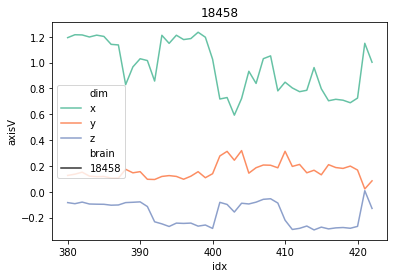

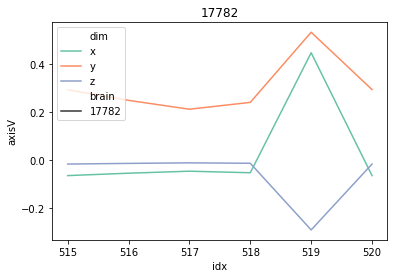

In [41]:
import matplotlib.pyplot as plt
for i in list(set(affILL.loc[:, 'brain'])):
    plt.figure()
    sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL[affILL['brain']==i], palette="Set2").set_title(i)
    plt.show()

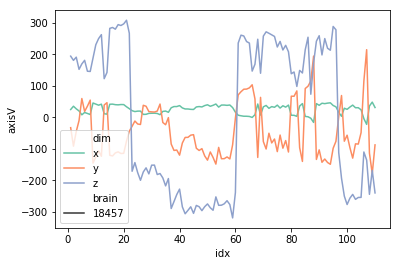

In [29]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL[affILL['brain']==18457], palette="Set2")



## Merge new marker

In [88]:
marker_folder = '/run/media/penglab/FISHZHAO/new_marker'
output_marker = '/run/media/penglab/FISHZHAO/new_marker_merge'
folder = os.path.exists(output_marker)
if not folder:  
    os.makedirs(output_marker)  
for i_brain in os.listdir(marker_folder ):
    if not os.path.exists(os.path.join(output_marker,i_brain)):
        os.makedirs(os.path.join(output_marker,i_brain))  
    output_sub = os.path.join(os.path.join(output_marker,i_brain),str(i_brain)+'_sub.marker')
    temp_sub1 = pd.DataFrame()
    temp_sub2 = pd.DataFrame()
    for inner_sub in os.listdir(os.path.join(marker_folder ,i_brain)):
        if not inner_sub.startswith("inner_sub"):
            continue
        path_inner = os.path.join(os.path.join(marker_folder ,i_brain),inner_sub)
        n_skip = 0
        with open(path_inner, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##x", "y", "z", "radius", "shape", "name","comment"," color_r","color_g","color_b"]
        temp_sub1 = pd.read_csv(path_inner, index_col=0, skiprows=n_skip, sep=",",
                          #usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
    for outline_sub in os.listdir(os.path.join(marker_folder ,i_brain)):
        if not outline_sub.startswith("outline_sub"):
            continue
        path_outline = os.path.join(os.path.join(marker_folder ,i_brain),outline_sub)
        n_skip = 0
        with open(path_outline, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##x", "y", "z", "radius", "shape", "name","comment"," color_r","color_g","color_b"]
        temp_sub2 = pd.read_csv(path_outline, index_col=0, skiprows=n_skip, sep=",",
                          #usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
        temp_sub1.append(temp_sub2).to_csv(output_sub, sep=",")

        print('Saving current file to ' + str(output_sub))
        #oldname = os.path.join(marker_folder ,i_brain)+ '/'+ str(inner_sub)
        #newname = os.path.join(,'pre') + '/'+ str(i_swc)
        #shutil.copyfile(oldname,newname)

Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17109/17109_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17302/17302_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17545/17545_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17781/17781_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17782/17782_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18454/18454_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18455/18455_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18457/18457_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18458/18458_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18464/18464_sub.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18869/18869_sub.marker

In [89]:
marker_folder = '/run/media/penglab/FISHZHAO/new_marker'
output_marker = '/run/media/penglab/FISHZHAO/new_marker_merge'
folder = os.path.exists(output_marker)
if not folder:  
    os.makedirs(output_marker)  
for i_brain in os.listdir(marker_folder ):
    if not os.path.exists(os.path.join(output_marker,i_brain)):
        os.makedirs(os.path.join(output_marker,i_brain))  
    output_tar = os.path.join(os.path.join(output_marker,i_brain),str(i_brain)+'_tar.marker')
    temp_tar1 = pd.DataFrame()
    temp_tar2 = pd.DataFrame()
    for inner_tar in os.listdir(os.path.join(marker_folder ,i_brain)):
        if not inner_tar.startswith("inner_tar"):
            continue
        path_inner = os.path.join(os.path.join(marker_folder ,i_brain),inner_tar)
        n_skip = 0
        with open(path_inner, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##x", "y", "z", "radius", "shape", "name","comment"," color_r","color_g","color_b"]
        temp_tar1 = pd.read_csv(path_inner, index_col=0, skiprows=n_skip, sep=",",
                          #usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
    for outline_tar in os.listdir(os.path.join(marker_folder ,i_brain)):
        if not outline_tar.startswith("outline_tar"):
            continue
        path_outline = os.path.join(os.path.join(marker_folder ,i_brain),outline_tar)
        n_skip = 0
        with open(path_outline, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##x", "y", "z", "radius", "shape", "name","comment"," color_r","color_g","color_b"]
        temp_tar2 = pd.read_csv(path_outline, index_col=0, skiprows=n_skip, sep=",",
                          #usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
        temp_tar1.append(temp_tar2).to_csv(output_tar, sep=",")

        print('Saving current file to ' + str(output_tar))
        #oldname = os.path.join(marker_folder ,i_brain)+ '/'+ str(inner_tar)
        #newname = os.path.join(,'pre') + '/'+ str(i_swc)
        #shutil.copyfile(oldname,newname)

Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17109/17109_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17302/17302_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17545/17545_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17781/17781_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/17782/17782_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18454/18454_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18455/18455_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18457/18457_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18458/18458_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18464/18464_tar.marker
Saving current file to /run/media/penglab/FISHZHAO/new_marker_merge/18869/18869_tar.marker

### Remove previous marker

In [90]:
import os
path_pipeline = '/run/media/penglab/FISHZHAO/Pipeline_registration'
for i_folder in os.listdir(path_pipeline):
    if i_folder != 'third_warp_swc':
        continue
    print('Find folder '+ str(i_folder))
    for i_sub in os.listdir(os.path.join(os.path.join(path_pipeline,i_folder),'brain_auto_marker')):
        if i_sub.endswith("sub.marker"):
            print('Remove '+ str(i_sub))
            os.remove(os.path.join(os.path.join(os.path.join(path_pipeline,i_folder),'brain_auto_marker'),i_sub))
    # remove tar
    for i_tar in os.listdir(os.path.join(os.path.join(path_pipeline,i_folder),'CCF_auto_marker')):
        if i_tar.endswith("tar.marker"):
            print('Remove '+ str(i_tar))
            os.remove(os.path.join(os.path.join(os.path.join(path_pipeline,i_folder),'CCF_auto_marker'),i_tar))

Find folder third_warp_swc
Remove 17109_sub.marker
Remove 17302_sub.marker
Remove 17545_sub.marker
Remove 17781_sub.marker
Remove 17782_sub.marker
Remove 18454_sub.marker
Remove 18455_sub.marker
Remove 18457_sub.marker
Remove 18458_sub.marker
Remove 18464_sub.marker
Remove 18869_sub.marker
Remove 236174_sub.marker
Remove 17109_tar.marker
Remove 17302_tar.marker
Remove 17545_tar.marker
Remove 17781_tar.marker
Remove 17782_tar.marker
Remove 18454_tar.marker
Remove 18455_tar.marker
Remove 18457_tar.marker
Remove 18458_tar.marker
Remove 18464_tar.marker
Remove 18869_tar.marker
Remove 236174_tar.marker


### Move new marker to the folder

In [91]:
for i_brain in os.listdir(output_marker):
    for i_marker in os.listdir(os.path.join(output_marker,i_brain)):
        if i_marker.endswith("sub.marker"):
            oldname = os.path.join(os.path.join(output_marker,i_brain),i_marker)
            newname = os.path.join(os.path.join(os.path.join(path_pipeline,'third_warp_swc'),'brain_auto_marker'),i_marker)
            shutil.copyfile(oldname,newname)
        if i_marker.endswith("tar.marker"):
            oldname = os.path.join(os.path.join(output_marker,i_brain),i_marker)
            newname = os.path.join(os.path.join(os.path.join(path_pipeline,'third_warp_swc'),'CCF_auto_marker'),i_marker)
            shutil.copyfile(oldname,newname)

## Allocate neurons to different people

In [86]:
output_todo = '/run/media/penglab/FISHZHAO/todo_12Dec'
folder = os.path.exists(output_todo)
if not folder:  
    os.makedirs(output_todo)  
PC_list = ['pan','panLeft','Yuanyuan','lulu','Shichen','panright','aliean']

thre = 10
ori_path = '/home/penglab/Documents/688_neurons'
brain_list = []
Used_list = []
for i_swc in os.listdir(ori_path):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    brain_temp = neuronname.split("_")[0]
    if brain_temp not in brain_list:
        brain_list.append(brain_temp)
for iter_PC in PC_list:
    print('Allocating swc for PC '+ str(iter_PC))
    if not os.path.exists(os.path.join(output_todo,iter_PC)):  
        os.makedirs(os.path.join(output_todo,iter_PC))  
    count_total = 0
    
    for iter_brain in brain_list:
        if iter_brain == '18457':
            continue
        if count_total < 5* thre:
            print('\tAllocating swc for PC '+ str(iter_PC)+' from brain '+ str(iter_brain))
            if not os.path.exists(os.path.join(os.path.join(output_todo,iter_PC),iter_brain)):  
                os.makedirs(os.path.join(os.path.join(output_todo,iter_PC),iter_brain))  
            count_swc = 0
            for i_swc in list(set(os.listdir(ori_path)) - set(Used_list)):
                if count_swc < thre:
                    if i_swc.startswith(iter_brain):
                        oldname = os.path.join(ori_path , i_swc)
                        newname = os.path.join(os.path.join(os.path.join(output_todo,iter_PC),iter_brain), i_swc)
                        shutil.copyfile(oldname,newname)
                        Used_list.append(i_swc)
                        print('\t\t Allocating swc '+ str(i_swc)+' for '+ str(iter_PC))
                        print('\t\t\tProcessing '+str(round((count_total/(5* thre)),2)))
                        count_swc = count_swc +1 
                        count_total = count_total + 1
    # then check the empty folder
    for iter_brain in os.listdir(os.path.join(output_todo,iter_PC)):
        if len(os.listdir(os.path.join(os.path.join(output_todo,iter_PC),iter_brain))) ==0:
            os.rmdir(os.path.join(os.path.join(output_todo,iter_PC),iter_brain))
            print('Remove empty brain folder for PC '+ str(iter_PC))
            
                        

Allocating swc for PC pan
	Allocating swc for PC pan from brain 17302
		 Allocating swc 17302_00031.ano.swc for pan
			Processing 0.0
		 Allocating swc 17302_00049.ano.swc for pan
			Processing 0.02
		 Allocating swc 17302_00066.ano.swc for pan
			Processing 0.04
		 Allocating swc 17302_00063.ano.swc for pan
			Processing 0.06
		 Allocating swc 17302_00106.ano.swc for pan
			Processing 0.08
		 Allocating swc 17302_00032.ano.swc for pan
			Processing 0.1
		 Allocating swc 17302_00054.ano.swc for pan
			Processing 0.12
		 Allocating swc 17302_00119.ano.swc for pan
			Processing 0.14
		 Allocating swc 17302_00020.ano.swc for pan
			Processing 0.16
		 Allocating swc 17302_00003.ano.swc for pan
			Processing 0.18
	Allocating swc for PC pan from brain 17545
		 Allocating swc 17545_00116.ano.swc for pan
			Processing 0.2
		 Allocating swc 17545_00136.ano.swc for pan
			Processing 0.22
		 Allocating swc 17545_00144.ano.swc for pan
			Processing 0.24
		 Allocating swc 17545_00067.ano.swc for pa

		 Allocating swc 17302_00080.ano.swc for Yuanyuan
			Processing 0.16
		 Allocating swc 17302_00074.ano.swc for Yuanyuan
			Processing 0.18
	Allocating swc for PC Yuanyuan from brain 17545
		 Allocating swc 17545_00118.ano.swc for Yuanyuan
			Processing 0.2
		 Allocating swc 17545_00169.ano.swc for Yuanyuan
			Processing 0.22
		 Allocating swc 17545_00172.ano.swc for Yuanyuan
			Processing 0.24
		 Allocating swc 17545_00170.ano.swc for Yuanyuan
			Processing 0.26
		 Allocating swc 17545_00093.ano.swc for Yuanyuan
			Processing 0.28
		 Allocating swc 17545_00044.ano.swc for Yuanyuan
			Processing 0.3
		 Allocating swc 17545_00052.ano.swc for Yuanyuan
			Processing 0.32
		 Allocating swc 17545_00095.ano.swc for Yuanyuan
			Processing 0.34
		 Allocating swc 17545_00166.ano.swc for Yuanyuan
			Processing 0.36
		 Allocating swc 17545_00159.ano.swc for Yuanyuan
			Processing 0.38
	Allocating swc for PC Yuanyuan from brain 17781
	Allocating swc for PC Yuanyuan from brain 17782
	Allocating swc

		 Allocating swc 17545_00071.ano.swc for Shichen
			Processing 0.26
		 Allocating swc 17545_00023.ano.swc for Shichen
			Processing 0.28
		 Allocating swc 17545_00164.ano.swc for Shichen
			Processing 0.3
		 Allocating swc 17545_00129.ano.swc for Shichen
			Processing 0.32
		 Allocating swc 17545_00158.ano.swc for Shichen
			Processing 0.34
		 Allocating swc 17545_00059.ano.swc for Shichen
			Processing 0.36
		 Allocating swc 17545_00030.ano.swc for Shichen
			Processing 0.38
	Allocating swc for PC Shichen from brain 17781
	Allocating swc for PC Shichen from brain 17782
	Allocating swc for PC Shichen from brain 18452
	Allocating swc for PC Shichen from brain 18454
		 Allocating swc 18454_00136.ano.swc for Shichen
			Processing 0.4
		 Allocating swc 18454_00020.ano.swc for Shichen
			Processing 0.42
		 Allocating swc 18454_00010.ano.swc for Shichen
			Processing 0.44
		 Allocating swc 18454_00063.ano.swc for Shichen
			Processing 0.46
		 Allocating swc 18454_00065.ano.swc for Shichen
	

		 Allocating swc 17545_00050.ano.swc for aliean
			Processing 0.26
		 Allocating swc 17545_00131.ano.swc for aliean
			Processing 0.28
		 Allocating swc 17545_00115.ano.swc for aliean
			Processing 0.3
		 Allocating swc 17545_00045.ano.swc for aliean
			Processing 0.32
		 Allocating swc 17545_00029.ano.swc for aliean
			Processing 0.34
		 Allocating swc 17545_00003.ano.swc for aliean
			Processing 0.36
		 Allocating swc 17545_00004.ano.swc for aliean
			Processing 0.38
	Allocating swc for PC aliean from brain 17781
	Allocating swc for PC aliean from brain 17782
	Allocating swc for PC aliean from brain 18452
	Allocating swc for PC aliean from brain 18454
		 Allocating swc 18454_00144.ano.swc for aliean
			Processing 0.4
		 Allocating swc 18454_00072.ano.swc for aliean
			Processing 0.42
		 Allocating swc 18454_00018.ano.swc for aliean
			Processing 0.44
		 Allocating swc 18454_00134.ano.swc for aliean
			Processing 0.46
		 Allocating swc 18454_00162.ano.swc for aliean
			Processing 0.4

### Compare the warp result

In [75]:
import numpy as np
import shutil

input_pre = '/home/penglab/Documents/result/2_affine_swc'
output_pre = '/home/penglab/Documents/result/cp_aff'

input_cur = '/home/penglab/Documents/result/resulk'
output_cur = '/home/penglab/Documents/result/cp_aff'

folder = os.path.exists(os.path.join(output_pre,'pre'))
if not folder:  
    os.makedirs(os.path.join(output_pre,'pre'))
for i_brain in os.listdir(input_pre):
    for i_swc in os.listdir(os.path.join(input_pre,i_brain)):
        oldname = os.path.join(input_pre,i_brain)+ '/'+ str(i_swc)
        newname = os.path.join(output_cur,'pre') + '/'+ str(i_swc)
        shutil.copyfile(oldname,newname)

folder = os.path.exists(os.path.join(output_cur,'cur'))
if not folder:  
    os.makedirs(os.path.join(output_cur,'cur'))
for i_brain in os.listdir(input_cur):
    for i_folder in os.listdir(os.path.join(input_cur,i_brain)):
        if i_folder == 'affine':
            for i_swc in os.listdir(os.path.join(os.path.join(input_cur,i_brain),i_folder)):
                oldname = os.path.join(os.path.join(input_cur,i_brain),i_folder) + '/'+ str(i_swc)
                newname = os.path.join(output_cur,'cur') + '/'+ str(i_swc)
                shutil.copyfile(oldname,newname)
                
                
cur_path_aff = '/home/penglab/Documents/result/cp_aff/cur'
pre_path_aff = '/home/penglab/Documents/result/cp_aff/pre'
affDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
pre_L = []

for i_swc in os.listdir(pre_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    pre_L.append(neuronname)
for i_swc in os.listdir(cur_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in pre_L :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    #brain_L.append(brain_temp)
    affDF.loc[iter_i,"brain"] = brain_temp
    affDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(pre_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_raff = os.path.join(pre_path_aff,i_swc_old)
    path_cur_raff = os.path.join(cur_path_aff,i_swc)
    n_skip = 0
    with open(path_pre_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF.shape[0])+' neurons to be compared in this table')

18

## Record number of finished neurons

In [101]:
import os
import shutil
fini_temp = '/run/media/penglab/FISHZHAO/14Dec'
#List_fini = []

for i_PC in os.listdir(fini_temp):
    for i_brain in os.listdir(os.path.join(fini_temp,i_PC)):
        for i_subfolder in os.listdir(os.path.join(os.path.join(fini_temp,i_PC),i_brain)):
            if i_subfolder == 'stps':
                temp_path = os.path.join(os.path.join(os.path.join(fini_temp,i_PC),i_brain),i_subfolder)
                for i_swc in os.listdir(temp_path):
                    (filename,extension) = os.path.splitext(i_swc)
                    (filename,extension) = os.path.splitext(filename)
                    (filename,extension) = os.path.splitext(filename)
                    if i_swc.endswith("stps.swc") and filename not in List_fini:    
                        print(filename)
                        List_fini.append(filename)
                        oldname = os.path.join(temp_path,i_swc)
                        newname = os.path.join('/home/penglab/Documents/result/compare_warp/warp_14Dec',i_swc)
                        shutil.move(oldname,newname)


17302_00003
17302_00020
17302_00031
17545_00025
17545_00055
17545_00067
17545_00078
17545_00092
17545_00116
17545_00122
17545_00126
17545_00136
17545_00144
17781_00001
17781_00002
17781_00003
17781_00004
17782_00001
18454_00050
18454_00056
18454_00057
18454_00066
18454_00095
18454_00099
18454_00126
18454_00148
18454_00155
18454_00167
18455_00009
18455_00015
18455_00022
18455_00041
18455_00048
18455_00122
18455_00125
18455_00139
18455_00158
18455_00224
17302_00016
17302_00037
17302_00038
17302_00044
17302_00057
17302_00059
17302_00075
17545_00075
17545_00089
17545_00121
17545_00130
17545_00142
17545_00149
17545_00174
18454_00157
18454_00171
18455_00134
18455_00135
18455_00146
18455_00151
18455_00154
18455_00166
18455_00201
18455_00207
18458_00242
18458_00430
17302_00110
17302_00115
17545_00129
17545_00145
18458_00575
18458_00577
17302_00023
17302_00034
17302_00046
17545_00044
17545_00052
17545_00093
17545_00095
17545_00118
17545_00159
17545_00166
18455_00004
18455_00020
18455_00021
1845

In [105]:
import datetime


assert len(List_fini) ==len(list(set(List_fini)))
print('Up to '+str(cur.month)+'.'+str(cur.day)+' , have finished '+str(len(List_fini))+' neurons')

Up to 12.14 , have finished 285 neurons


14

## ALocate neurons

In [106]:
output_todo = '/run/media/penglab/FISHZHAO/todo_14Dec'
folder = os.path.exists(output_todo)
if not folder:  
    os.makedirs(output_todo)  
PC_list = ['pan','panLeft','Yuanyuan','lulu','Shichen','panright','aliean']

thre = 10
ori_path = '/home/penglab/Documents/688_neurons'
brain_list = []
Used_list = []
for i_swc in os.listdir(ori_path):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    brain_temp = neuronname.split("_")[0]
    if brain_temp not in brain_list:
        brain_list.append(brain_temp)
for iter_PC in PC_list:
    print('Allocating swc for PC '+ str(iter_PC))
    if not os.path.exists(os.path.join(output_todo,iter_PC)):  
        os.makedirs(os.path.join(output_todo,iter_PC))  
    count_total = 0
    
    for iter_brain in brain_list:
        if iter_brain == '18457':
            continue
        if count_total < 5* thre:
            print('\tAllocating swc for PC '+ str(iter_PC)+' from brain '+ str(iter_brain))
            if not os.path.exists(os.path.join(os.path.join(output_todo,iter_PC),iter_brain)):  
                os.makedirs(os.path.join(os.path.join(output_todo,iter_PC),iter_brain))  
            count_swc = 0
            for i_swc in list(set(os.listdir(ori_path)) - set(List_fini)- set(Used_list)):
                if count_swc < thre:
                    if i_swc.startswith(iter_brain):
                        oldname = os.path.join(ori_path , i_swc)
                        newname = os.path.join(os.path.join(os.path.join(output_todo,iter_PC),iter_brain), i_swc)
                        shutil.copyfile(oldname,newname)
                        Used_list.append(i_swc)
                        print('\t\t Allocating swc '+ str(i_swc)+' for '+ str(iter_PC))
                        print('\t\t\tProcessing '+str(round((count_total/(5* thre)),2)))
                        count_swc = count_swc +1 
                        count_total = count_total + 1
    # then check the empty folder
    for iter_brain in os.listdir(os.path.join(output_todo,iter_PC)):
        if len(os.listdir(os.path.join(os.path.join(output_todo,iter_PC),iter_brain))) ==0:
            os.rmdir(os.path.join(os.path.join(output_todo,iter_PC),iter_brain))
            print('Remove empty brain folder for PC '+ str(iter_PC))
            
                        

Allocating swc for PC pan
	Allocating swc for PC pan from brain 17302
		 Allocating swc 17302_00031.ano.swc for pan
			Processing 0.0
		 Allocating swc 17302_00049.ano.swc for pan
			Processing 0.02
		 Allocating swc 17302_00066.ano.swc for pan
			Processing 0.04
		 Allocating swc 17302_00063.ano.swc for pan
			Processing 0.06
		 Allocating swc 17302_00106.ano.swc for pan
			Processing 0.08
		 Allocating swc 17302_00032.ano.swc for pan
			Processing 0.1
		 Allocating swc 17302_00054.ano.swc for pan
			Processing 0.12
		 Allocating swc 17302_00119.ano.swc for pan
			Processing 0.14
		 Allocating swc 17302_00020.ano.swc for pan
			Processing 0.16
		 Allocating swc 17302_00003.ano.swc for pan
			Processing 0.18
	Allocating swc for PC pan from brain 17545
		 Allocating swc 17545_00116.ano.swc for pan
			Processing 0.2
		 Allocating swc 17545_00136.ano.swc for pan
			Processing 0.22
		 Allocating swc 17545_00144.ano.swc for pan
			Processing 0.24
		 Allocating swc 17545_00067.ano.swc for pa

		 Allocating swc 17302_00074.ano.swc for Yuanyuan
			Processing 0.18
	Allocating swc for PC Yuanyuan from brain 17545
		 Allocating swc 17545_00118.ano.swc for Yuanyuan
			Processing 0.2
		 Allocating swc 17545_00169.ano.swc for Yuanyuan
			Processing 0.22
		 Allocating swc 17545_00172.ano.swc for Yuanyuan
			Processing 0.24
		 Allocating swc 17545_00170.ano.swc for Yuanyuan
			Processing 0.26
		 Allocating swc 17545_00093.ano.swc for Yuanyuan
			Processing 0.28
		 Allocating swc 17545_00044.ano.swc for Yuanyuan
			Processing 0.3
		 Allocating swc 17545_00052.ano.swc for Yuanyuan
			Processing 0.32
		 Allocating swc 17545_00095.ano.swc for Yuanyuan
			Processing 0.34
		 Allocating swc 17545_00166.ano.swc for Yuanyuan
			Processing 0.36
		 Allocating swc 17545_00159.ano.swc for Yuanyuan
			Processing 0.38
	Allocating swc for PC Yuanyuan from brain 17781
	Allocating swc for PC Yuanyuan from brain 17782
	Allocating swc for PC Yuanyuan from brain 18452
	Allocating swc for PC Yuanyuan from

		 Allocating swc 17545_00164.ano.swc for Shichen
			Processing 0.3
		 Allocating swc 17545_00129.ano.swc for Shichen
			Processing 0.32
		 Allocating swc 17545_00158.ano.swc for Shichen
			Processing 0.34
		 Allocating swc 17545_00059.ano.swc for Shichen
			Processing 0.36
		 Allocating swc 17545_00030.ano.swc for Shichen
			Processing 0.38
	Allocating swc for PC Shichen from brain 17781
	Allocating swc for PC Shichen from brain 17782
	Allocating swc for PC Shichen from brain 18452
	Allocating swc for PC Shichen from brain 18454
		 Allocating swc 18454_00136.ano.swc for Shichen
			Processing 0.4
		 Allocating swc 18454_00020.ano.swc for Shichen
			Processing 0.42
		 Allocating swc 18454_00010.ano.swc for Shichen
			Processing 0.44
		 Allocating swc 18454_00063.ano.swc for Shichen
			Processing 0.46
		 Allocating swc 18454_00065.ano.swc for Shichen
			Processing 0.48
		 Allocating swc 18454_00169.ano.swc for Shichen
			Processing 0.5
		 Allocating swc 18454_00141.ano.swc for Shichen
		

		 Allocating swc 17545_00003.ano.swc for aliean
			Processing 0.36
		 Allocating swc 17545_00004.ano.swc for aliean
			Processing 0.38
	Allocating swc for PC aliean from brain 17781
	Allocating swc for PC aliean from brain 17782
	Allocating swc for PC aliean from brain 18452
	Allocating swc for PC aliean from brain 18454
		 Allocating swc 18454_00144.ano.swc for aliean
			Processing 0.4
		 Allocating swc 18454_00072.ano.swc for aliean
			Processing 0.42
		 Allocating swc 18454_00018.ano.swc for aliean
			Processing 0.44
		 Allocating swc 18454_00134.ano.swc for aliean
			Processing 0.46
		 Allocating swc 18454_00162.ano.swc for aliean
			Processing 0.48
		 Allocating swc 18454_00111.ano.swc for aliean
			Processing 0.5
		 Allocating swc 18454_00060.ano.swc for aliean
			Processing 0.52
		 Allocating swc 18454_00011.ano.swc for aliean
			Processing 0.54
		 Allocating swc 18454_00059.ano.swc for aliean
			Processing 0.56
		 Allocating swc 18454_00022.ano.swc for aliean
			Processing 0.5

## Compare warpping result on 13 Dec

In [108]:
import numpy as np
import shutil
import seaborn as sns
                
                
cur_path_stps = '/home/penglab/Documents/result/compare_warp/warp_13Dec'
pre_path_stps = '/home/penglab/Documents/result/compare_warp/result_swc15NovNew'
warpDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
pre_L = []

for i_swc in os.listdir(pre_path_stps):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    pre_L.append(neuronname)
for i_swc in os.listdir(cur_path_stps):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in pre_L :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    #brain_L.append(brain_temp)
    warpDF.loc[iter_i,"brain"] = brain_temp
    warpDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(pre_path_stps):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_raff = os.path.join(pre_path_stps,i_swc_old)
    path_cur_raff = os.path.join(cur_path_stps,i_swc)
    n_skip = 0
    with open(path_pre_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    warpDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    warpDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    warpDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    warpDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    warpDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    warpDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(warpDF.shape[0])+' neurons to be compared in this table')

n_value = warpDF.shape[0]
warpDF.loc[:, 'brain'] = warpDF.loc[:, 'brain'].astype(int)
warpDF.loc[:,'idx'] = warpDF.index.tolist()
warpDF.loc[:, 'pre_x'] = warpDF.loc[:, 'pre_x'].astype(float)
warpDF.loc[:, 'pre_y'] = warpDF.loc[:, 'pre_y'].astype(float)
warpDF.loc[:, 'pre_z'] = warpDF.loc[:, 'pre_z'].astype(float)
warpDF.loc[:,'subx'] = warpDF.loc[:,'pre_x'] - warpDF.loc[:,'cur_x']
warpDF.loc[:,'suby'] = warpDF.loc[:,'pre_y'] - warpDF.loc[:,'cur_y']
warpDF.loc[:,'subz'] = warpDF.loc[:,'pre_z'] - warpDF.loc[:,'cur_z']
warpDF.loc[:, 'subx'] = warpDF.loc[:, 'subx'].astype(float)
warpDF.loc[:, 'suby'] = warpDF.loc[:, 'suby'].astype(float)
warpDF.loc[:, 'subz'] = warpDF.loc[:, 'subz'].astype(float)
warpILL = pd.DataFrame(index = range(1,warpDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
warpILL.loc[:, 'idx'] = np.tile(range(1,warpDF.shape[0]+1), 3)
warpILL.loc[:, 'axisV'] = warpILL.loc[:, 'axisV'].astype(float)
warpILL.loc[range(1,n_value+1), 'brain'] = warpDF.loc[:,'brain'].tolist()
warpILL.loc[range(1,n_value+1),'axisV']=warpDF.loc[:,'subx'].tolist()
warpILL.loc[range(1,n_value+1),'dim']='x'
warpILL.loc[range(1,n_value+1),'neuronID']=warpDF.loc[:, 'neuronID'].tolist()

warpILL.loc[range(n_value+1,n_value*2+1), 'brain'] = warpDF.loc[:,'brain'].tolist()
warpILL.loc[range(n_value+1,n_value*2+1),'axisV']=warpDF.loc[:,'suby'].tolist()
warpILL.loc[range(n_value+1,n_value*2+1),'dim']='y'
warpILL.loc[range(n_value+1,n_value*2+1),'neuronID']=warpDF.loc[:, 'neuronID'].tolist()

warpILL.loc[range(n_value*2+1,n_value*3+1), 'brain'] =warpDF.loc[:,'brain'].tolist()
warpILL.loc[range(n_value*2+1,n_value*3+1),'axisV']=warpDF.loc[:,'subz'].tolist()
warpILL.loc[range(n_value*2+1,n_value*3+1),'dim']='z'
warpILL.loc[range(n_value*2+1,n_value*3+1),'neuronID']=warpDF.loc[:, 'neuronID'].tolist()

warpILL.loc[:, 'brain'] = warpILL.loc[:, 'brain'].astype(int)

Processing neuron 17302_00013
Processing neuron 17302_00018
Processing neuron 17302_00025
Processing neuron 17302_00077
Processing neuron 17302_00095
Processing neuron 17302_00101
Processing neuron 17302_00105
Processing neuron 17302_00002
Processing neuron 17302_00007
Processing neuron 17545_00023
Processing neuron 17545_00026
Processing neuron 17545_00030
Processing neuron 17545_00059
Processing neuron 17545_00071
Processing neuron 17545_00090
Processing neuron 17545_00028
Processing neuron 17545_00046
Processing neuron 17545_00047
Processing neuron 18454_00010
Processing neuron 18454_00020
Processing neuron 18454_00052
Processing neuron 18454_00063
Processing neuron 18454_00065
Processing neuron 18454_00068
Processing neuron 18454_00136
Processing neuron 18454_00141
Processing neuron 18454_00147
Processing neuron 18454_00169
Processing neuron 18454_00002
Processing neuron 18454_00014
Processing neuron 18454_00028
Processing neuron 18454_00049
Processing neuron 18454_00107
Processing

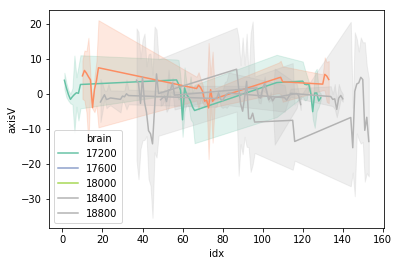

In [109]:
sns.lineplot(x='idx', y= 'axisV',hue='brain',data=warpILL, palette="Set2")

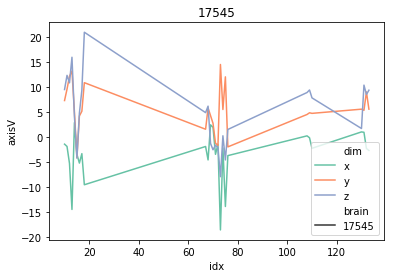

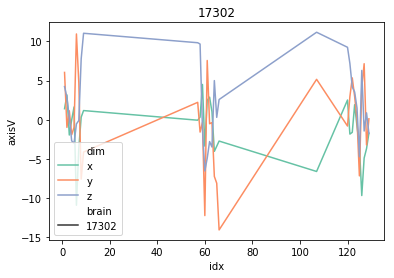

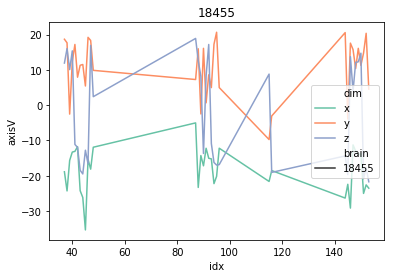

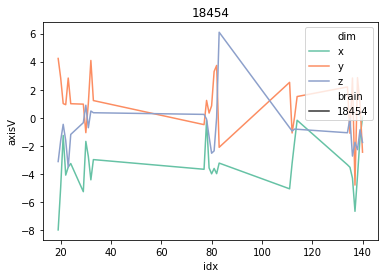

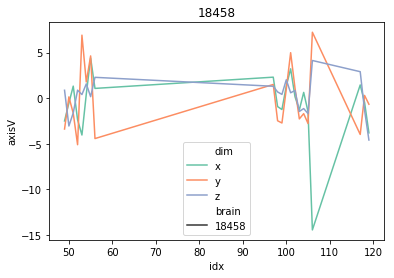

In [110]:
import matplotlib.pyplot as plt
for i in list(set(warpILL.loc[:, 'brain'])):
    plt.figure()
    sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=warpILL[warpILL['brain']==i], palette="Set2").set_title(i)
    plt.show()

Processing neuron 17302_00003
Processing neuron 17302_00020
Processing neuron 17302_00031
Processing neuron 17545_00025
Processing neuron 17545_00055
Processing neuron 17545_00067
Processing neuron 17545_00078
Processing neuron 17545_00092
Processing neuron 17545_00116
Processing neuron 17545_00122
Processing neuron 17545_00126
Processing neuron 17545_00136
Processing neuron 17545_00144
Processing neuron 17781_00001
Processing neuron 17781_00002
Processing neuron 17781_00003
Processing neuron 17781_00004
Processing neuron 17782_00001
Processing neuron 18454_00050
Processing neuron 18454_00056
Processing neuron 18454_00057
Processing neuron 18454_00066
Processing neuron 18454_00095
Processing neuron 18454_00099
Processing neuron 18454_00126
Processing neuron 18454_00148
Processing neuron 18454_00155
Processing neuron 18454_00167
Processing neuron 18455_00009
Processing neuron 18455_00015
Processing neuron 18455_00022
Processing neuron 18455_00041
Processing neuron 18455_00048
Processing

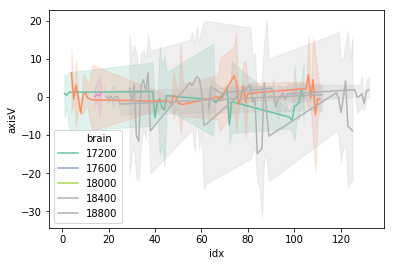

In [111]:
import numpy as np
import shutil
import seaborn as sns
                
                
cur_path_stps = '/home/penglab/Documents/result/compare_warp/warp_14Dec'
pre_path_stps = '/home/penglab/Documents/result/compare_warp/result_swc15NovNew'
warpDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
pre_L = []

for i_swc in os.listdir(pre_path_stps):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    pre_L.append(neuronname)
for i_swc in os.listdir(cur_path_stps):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in pre_L :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    #brain_L.append(brain_temp)
    warpDF.loc[iter_i,"brain"] = brain_temp
    warpDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(pre_path_stps):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_raff = os.path.join(pre_path_stps,i_swc_old)
    path_cur_raff = os.path.join(cur_path_stps,i_swc)
    n_skip = 0
    with open(path_pre_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    warpDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    warpDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    warpDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    warpDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    warpDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    warpDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(warpDF.shape[0])+' neurons to be compared in this table')

n_value = warpDF.shape[0]
warpDF.loc[:, 'brain'] = warpDF.loc[:, 'brain'].astype(int)
warpDF.loc[:,'idx'] = warpDF.index.tolist()
warpDF.loc[:, 'pre_x'] = warpDF.loc[:, 'pre_x'].astype(float)
warpDF.loc[:, 'pre_y'] = warpDF.loc[:, 'pre_y'].astype(float)
warpDF.loc[:, 'pre_z'] = warpDF.loc[:, 'pre_z'].astype(float)
warpDF.loc[:,'subx'] = warpDF.loc[:,'pre_x'] - warpDF.loc[:,'cur_x']
warpDF.loc[:,'suby'] = warpDF.loc[:,'pre_y'] - warpDF.loc[:,'cur_y']
warpDF.loc[:,'subz'] = warpDF.loc[:,'pre_z'] - warpDF.loc[:,'cur_z']
warpDF.loc[:, 'subx'] = warpDF.loc[:, 'subx'].astype(float)
warpDF.loc[:, 'suby'] = warpDF.loc[:, 'suby'].astype(float)
warpDF.loc[:, 'subz'] = warpDF.loc[:, 'subz'].astype(float)
warpILL2 = pd.DataFrame(index = range(1,warpDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
warpILL2.loc[:, 'idx'] = np.tile(range(1,warpDF.shape[0]+1), 3)
warpILL2.loc[:, 'axisV'] = warpILL2.loc[:, 'axisV'].astype(float)
warpILL2.loc[range(1,n_value+1), 'brain'] = warpDF.loc[:,'brain'].tolist()
warpILL2.loc[range(1,n_value+1),'axisV']=warpDF.loc[:,'subx'].tolist()
warpILL2.loc[range(1,n_value+1),'dim']='x'
warpILL2.loc[range(1,n_value+1),'neuronID']=warpDF.loc[:, 'neuronID'].tolist()

warpILL2.loc[range(n_value+1,n_value*2+1), 'brain'] = warpDF.loc[:,'brain'].tolist()
warpILL2.loc[range(n_value+1,n_value*2+1),'axisV']=warpDF.loc[:,'suby'].tolist()
warpILL2.loc[range(n_value+1,n_value*2+1),'dim']='y'
warpILL2.loc[range(n_value+1,n_value*2+1),'neuronID']=warpDF.loc[:, 'neuronID'].tolist()

warpILL2.loc[range(n_value*2+1,n_value*3+1), 'brain'] =warpDF.loc[:,'brain'].tolist()
warpILL2.loc[range(n_value*2+1,n_value*3+1),'axisV']=warpDF.loc[:,'subz'].tolist()
warpILL2.loc[range(n_value*2+1,n_value*3+1),'dim']='z'
warpILL2.loc[range(n_value*2+1,n_value*3+1),'neuronID']=warpDF.loc[:, 'neuronID'].tolist()

warpILL2.loc[:, 'brain'] = warpILL2.loc[:, 'brain'].astype(int)
sns.lineplot(x='idx', y= 'axisV',hue='brain',data=warpILL2, palette="Set2")

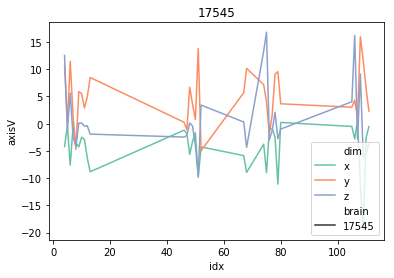

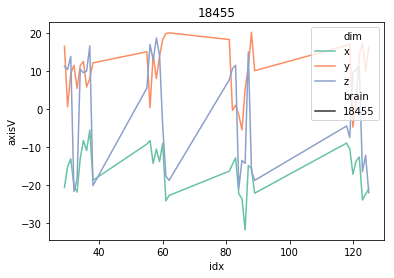

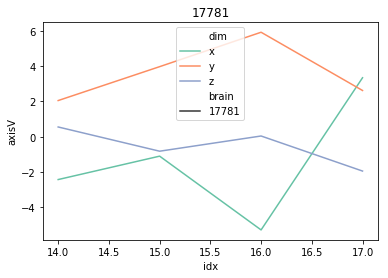

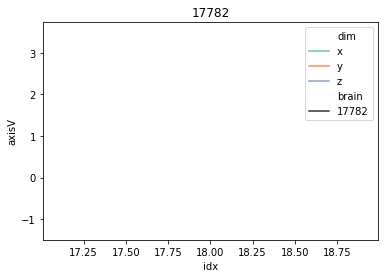

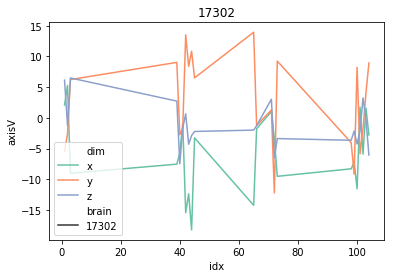

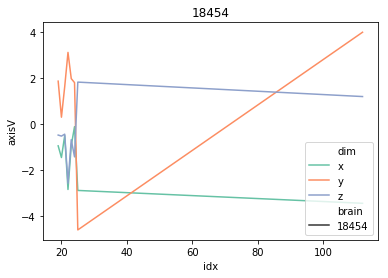

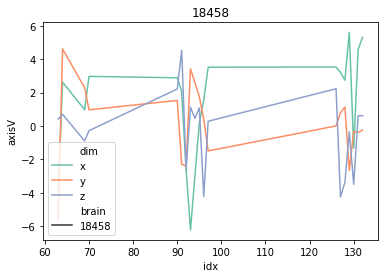

In [112]:
import matplotlib.pyplot as plt
for i in list(set(warpILL2.loc[:, 'brain'])):
    plt.figure()
    sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=warpILL2[warpILL2['brain']==i], palette="Set2").set_title(i)
    plt.show()